# Garmin Cycling Report

In [18]:
import tcxtools
import helper
import graph
import correlation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# TCX and CSV files name without extension

In [2]:
filename = 'activity_5173186556'

# Reading .TCX file

In [3]:
tcx_data = tcxtools.TCXPandas('./cycling/' + filename + '.tcx')
tracks, laps = tcx_data.parse()
#tracks = tracks.set_index('time')

# Reading .CSV file

In [4]:
csv_data = pd.read_csv('./cycling/' + filename + '.csv')

# Calculating time in seconds
csv_data['Time (s)'] = csv_data['Time'].apply(helper.get_sec)

# Calculating Power in watts
csv_data['Power (w)'] = csv_data['Calories'] * 4184 / csv_data['Time (s)']

# Calculating Energy in kilojoules
csv_data['Energy (kj)'] = (csv_data['Power (w)'] * csv_data['Time (s)']) / 1000

csv_data

,Laps,Time,Cumulative Time,Distance,Avg Speed,Avg HR,Max HR,Elev Gain,Elev Loss,Calories,Max Speed,Moving Time,Avg Moving Speed,Time (s),Power (w),Energy (kj)
0,1,19:18,19:18,5.00,15.5,129,145,79,73,149,47.6,19:07,15.7,1158,538.355786,623.416
1,2,15:44,35:01,5.00,19.1,131,151,51,77,112,40.6,15:44,19.1,944,496.406780,468.608
2,3,17:06,52:07,5.00,17.6,131,145,47,50,111,41.8,16:48,17.9,1026,452.654971,464.424
3,4,15:08,1:07:15,4.05,16.1,135,148,56,31,103,45.5,14:44,16.5,908,474.616740,430.952
4,Summary,1:07:15,1:07:15,19.05,17.0,131,151,233,231,475,47.6,1:06:23,17.2,4035,492.540273,1987.400


In [5]:
csv = csv_data.head(-1)
csv_summary = csv_data.tail(1)

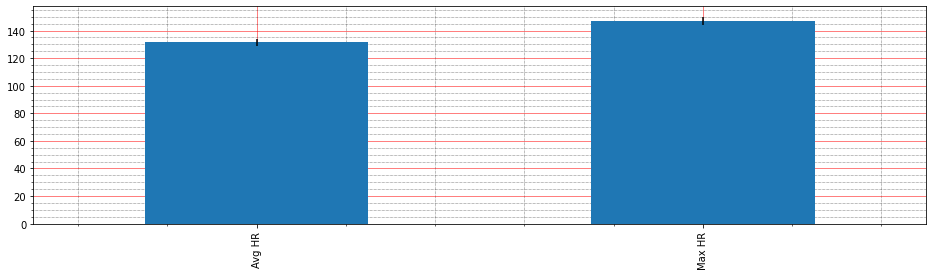

In [6]:
graph.mean(csv[['Avg HR', 'Max HR']])

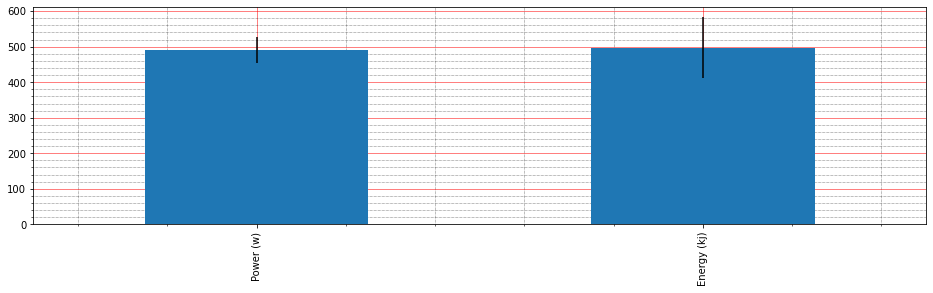

In [7]:
graph.mean(csv[['Power (w)', 'Energy (kj)']])

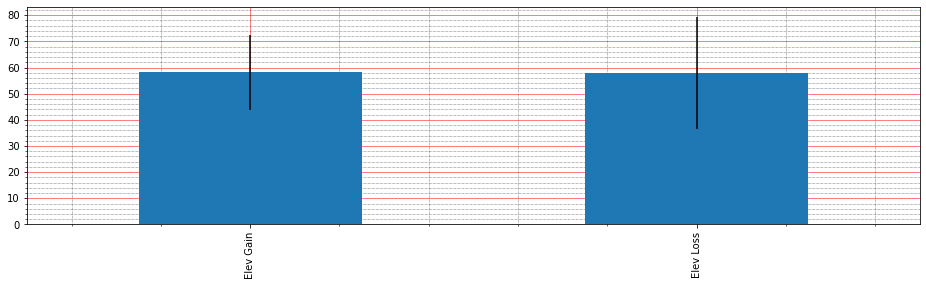

In [8]:
graph.mean(csv[['Elev Gain', 'Elev Loss']])

# Tracking points

In [9]:
# dropping invalid tracks
tracks.dropna(inplace=True)

# renaming column
tracks.rename(columns={'distance':'distance cumulative'}, inplace=True)

# Getting the distance at each tracking point
tracks['distance'] = tracks['distance cumulative'].diff()

tracks['time diff'] = tracks['time'].diff()

tracks

,time,distance cumulative,hr,latitude,longitude,altitude,speed (m/s),speed (km/h),distance,time diff
5,2020-07-01 15:30:54+00:00,0.000000,114,-15.836310,-48.020298,1137.199951,2.930,10.5480,NaN,NaT
8,2020-07-01 15:31:00+00:00,23.700001,114,-15.836360,-48.020512,1136.400024,2.865,10.3140,23.700001,00:00:06
9,2020-07-01 15:31:03+00:00,32.950001,110,-15.836415,-48.020582,1136.400024,2.855,10.2780,9.250000,00:00:03
10,2020-07-01 15:31:04+00:00,36.540001,107,-15.836439,-48.020610,1136.400024,2.976,10.7136,3.590000,00:00:01
11,2020-07-01 15:31:05+00:00,39.110001,104,-15.836488,-48.020628,1136.599976,2.967,10.6812,2.570000,00:00:01
...,...,...,...,...,...,...,...,...,...,...
1069,2020-07-01 16:42:36+00:00,19030.820312,139,-15.836800,-48.020243,1139.000000,3.630,13.0680,16.460938,00:00:04
1070,2020-07-01 16:42:42+00:00,19050.230469,139,-15.836952,-48.020152,1139.400024,1.922,6.9192,19.410156,00:00:06
1071,2020-07-01 16:42:47+00:00,19052.009766,135,-15.836945,-48.020129,1139.400024,0.802,2.8872,1.779297,00:00:05
1072,2020-07-01 16:42:52+00:00,19052.490234,132,-15.836961,-48.020151,1139.400024,0.000,0.0000,0.480469,00:00:05


# Time between tracking points

In [10]:
tracks['time diff'].describe()

count                      1066
mean     0 days 00:00:04.054409
std      0 days 00:00:09.001348
min             0 days 00:00:00
25%             0 days 00:00:02
50%             0 days 00:00:04
75%             0 days 00:00:06
max             0 days 00:04:51
Name: time diff, dtype: object

# Distance at each tracking point

In [11]:
tracks['distance'].describe()

count    1066.000000
mean       17.872880
std        10.915496
min         0.000000
25%        10.542530
50%        16.074951
75%        23.242554
max        65.790039
Name: distance, dtype: float64

# Total Distance (meters)

In [12]:
round(tracks['distance cumulative'].tail(1).values[0], 3)

19052.49

# Speed (km/h) per Tracking Point

In [13]:
tracks['speed (km/h)'].describe()

count    1067.000000
mean       18.267473
std         8.824164
min         0.000000
25%        11.151000
50%        16.862400
75%        23.749200
max        46.220399
Name: speed (km/h), dtype: float64

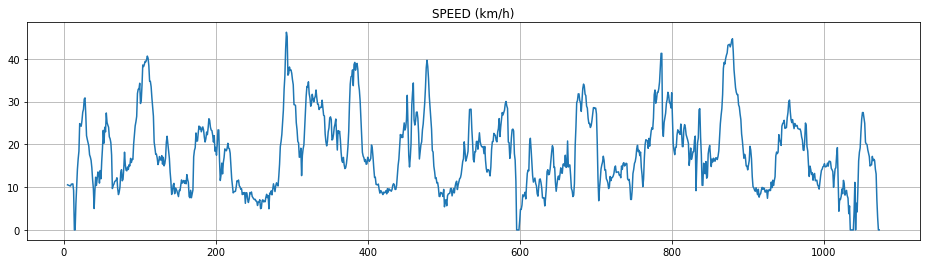

In [14]:
graph = tracks['speed (km/h)']
graph.plot(figsize=(16,4))
plt.title('SPEED (km/h)')
plt.grid()

# Speed (km/h) per Lap

In [15]:
csv[['Avg Speed', 'Max Speed']].describe()

,Avg Speed,Max Speed
count,4.000000,4.000000
mean,17.075000,43.875000
std,1.613227,3.242813
min,15.500000,40.600000
25%,15.950000,41.500000
50%,16.850000,43.650000
75%,17.975000,46.025000
max,19.100000,47.600000


# Power (watts)

In [16]:
csv['Power (w)'].describe()

count      4.000000
mean     490.508569
std       36.558584
min      452.654971
25%      469.126298
50%      485.511760
75%      506.894031
max      538.355786
Name: Power (w), dtype: float64

# Power (w) vs Speed (km/h)

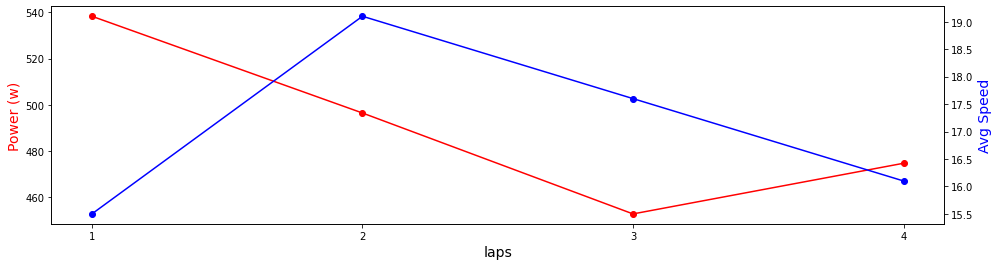

In [20]:
graph.overlay(csv.Laps, csv['Power (w)'], csv['Avg Speed'])

# Energy (kj)

In [21]:
csv['Energy (kj)'].describe()

count      4.0000
mean     496.8500
std       86.0437
min      430.9520
25%      456.0560
50%      466.5160
75%      507.3100
max      623.4160
Name: Energy (kj), dtype: float64

# Energy (kj) vs Power (watts)

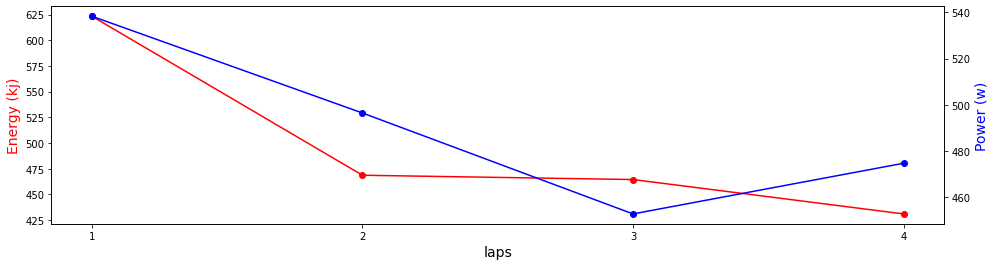

In [22]:
graph.overlay(csv.Laps, csv['Energy (kj)'], csv['Power (w)'])

# Energy (kj) vs Speed (km/h)

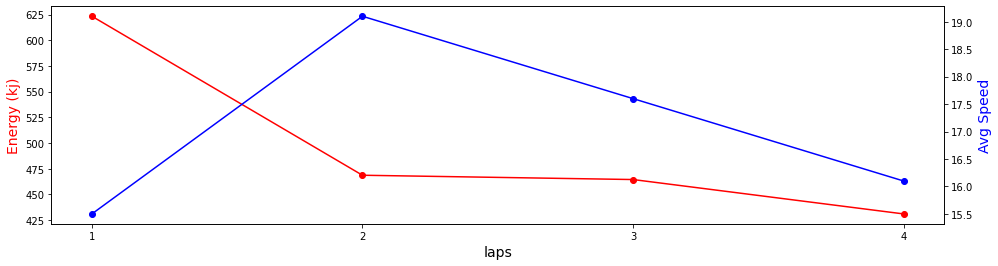

In [23]:
graph.overlay(csv.Laps, csv['Energy (kj)'], csv['Avg Speed'])

# Heart Rate (bpm)

In [24]:
tracks['hr'].describe()

count    1067.000000
mean      128.989691
std        10.632126
min       101.000000
25%       121.000000
50%       132.000000
75%       137.000000
max       150.000000
Name: hr, dtype: float64

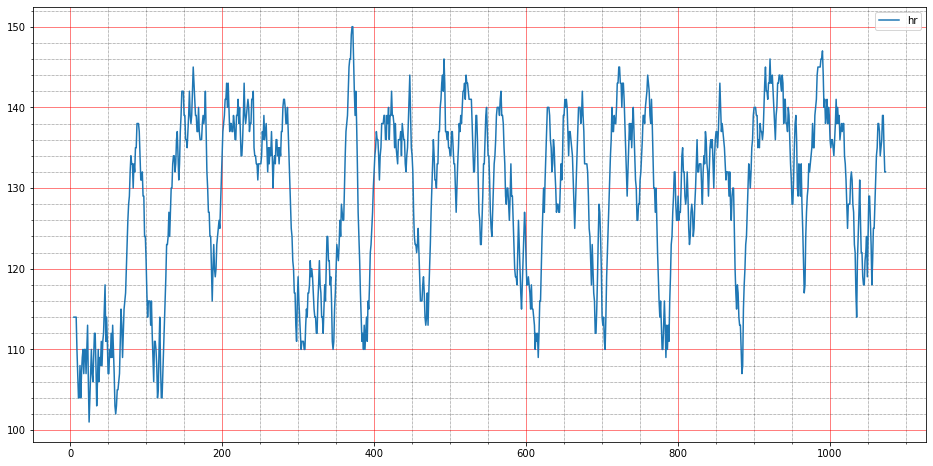

In [25]:
graph.heartrate(tracks['hr'])

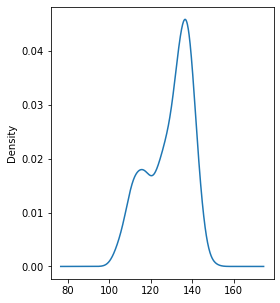

In [26]:
tracks['hr'].plot(kind='kde', figsize=(4,5));

# Avg Heart Rate vs Power

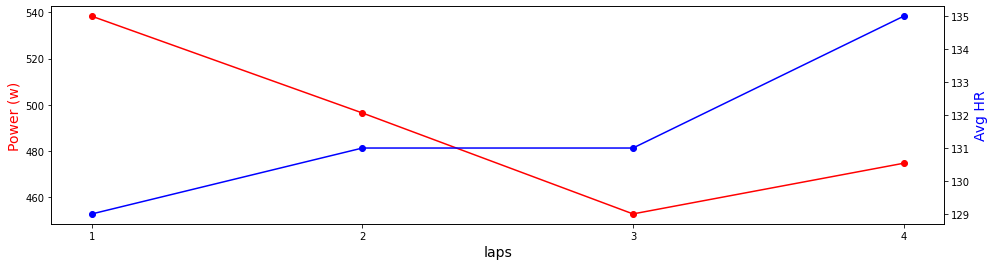

In [27]:
graph.overlay(csv.Laps, csv['Power (w)'], csv["Avg HR"])

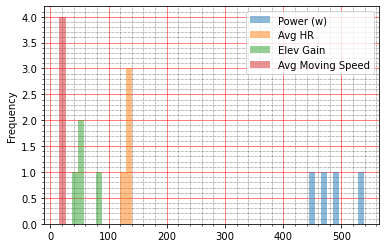

In [28]:
graph.overlay_hist(csv[['Power (w)', 'Avg HR', 'Elev Gain', 'Avg Moving Speed']])

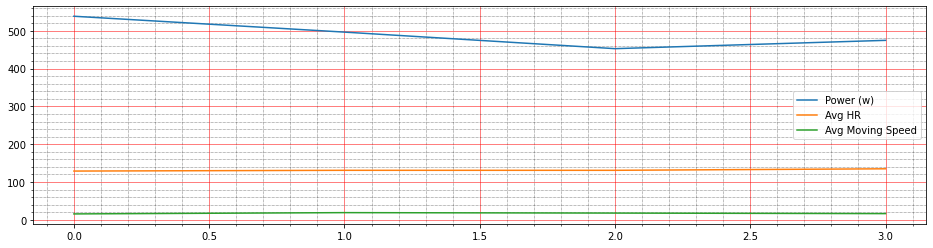

In [29]:
graph.overlay_timeseries(csv[['Power (w)', 'Avg HR', 'Avg Moving Speed']])

# Scatter plots

# Speed vs Heart Rate

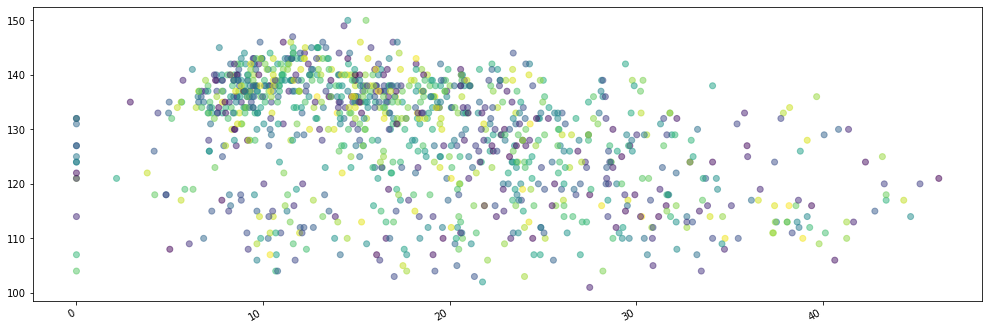

In [30]:
graph.scatter(tracks['speed (km/h)'], tracks['hr'])

# Correlations

In [31]:
csv_corr = csv[['Avg HR', 'Max HR', 'Calories', 'Max Speed', 'Avg Speed', 'Power (w)', 'Energy (kj)']]
corr = correlation.get_number(csv_corr)
corr

,Avg HR,Max HR,Calories,Max Speed,Avg Speed,Power (w),Energy (kj)
Avg HR,1.000000,0.731570,-0.240837,0.204883,-0.008161,0.893802,-0.240837
Max HR,0.731570,1.000000,-0.837888,-0.517417,0.675773,0.348132,-0.837888
Calories,-0.240837,-0.837888,1.000000,0.900633,-0.968568,0.220002,1.000000
Max Speed,0.204883,-0.517417,0.900633,1.000000,-0.980426,0.622074,0.900633
Avg Speed,-0.008161,0.675773,-0.968568,-0.980426,1.000000,-0.455742,-0.968568
Power (w),0.893802,0.348132,0.220002,0.622074,-0.455742,1.000000,0.220002
Energy (kj),-0.240837,-0.837888,1.000000,0.900633,-0.968568,0.220002,1.000000


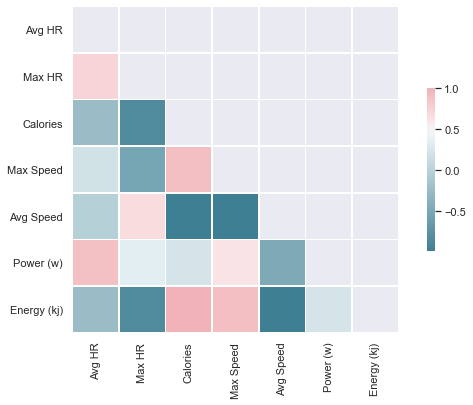

In [32]:
correlation.heatmap(corr)